# Toxic Comment Classification

In [289]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
file = "train.csv/train.csv"
train = pd.read_csv(file)


In [291]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [292]:
train["toxic_all"] = np.where((train["toxic"] == 0) & (train["severe_toxic"] == 0) & (train["obscene"] == 0) & (train["threat"] == 0) & (train["insult"] ==0) & (train["identity_hate"] == 0),0,1)

train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_all
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0


In [293]:
missing_values_check = train.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
toxic_all        0
dtype: int64


In [294]:

# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = train.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(train))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(train)-clean_comments_count))


Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [295]:
categories = list(train.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'toxic_all']


In [296]:
def bar_count(ax):
    """
    This func annotate the bar chart by calculating the bar hieght and shows
    distribution as count.
    :param ax: class 'matplotlib.axes._subplots.AxesSubplot
    :return: Nonetype
    """
    totals = []  # create a empty list

    for i in ax.patches:  # ax.patches to select each bar as a rectangle
        totals.append(i.get_height())  # .get_height() is used for vertical bar chart use .get_width() for horizontal()

    total = sum(totals)  # for getting total no of elements with height as proxy

    for i in ax.patches:
        ax.text(i.get_x() + 0.15, i.get_height() + 50, str(round(i.get_height(),2)), color='black')


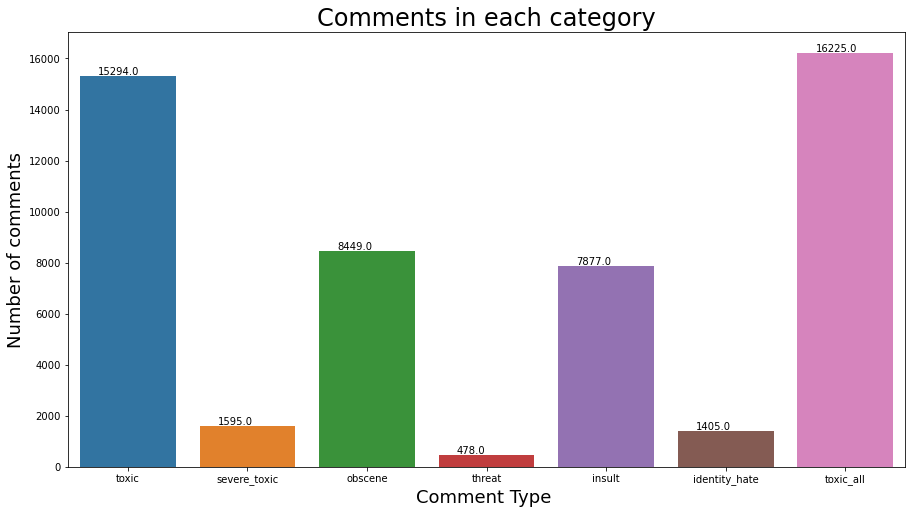

In [297]:
plt.figure(figsize=(15,8))
ax= sns.barplot(x=categories, y= train.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

bar_count(ax)

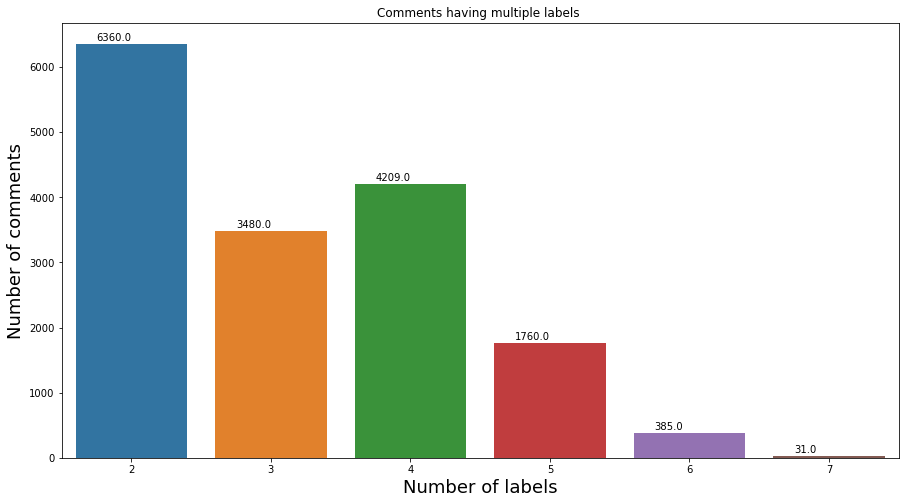

In [298]:
rowSums = train.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = pd.DataFrame(multiLabel_counts.iloc[1:])


plt.figure(figsize=(15,8))

ax = sns.barplot(x=multiLabel_counts.index,y=multiLabel_counts[0],data=multiLabel_counts)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

bar_count(ax)

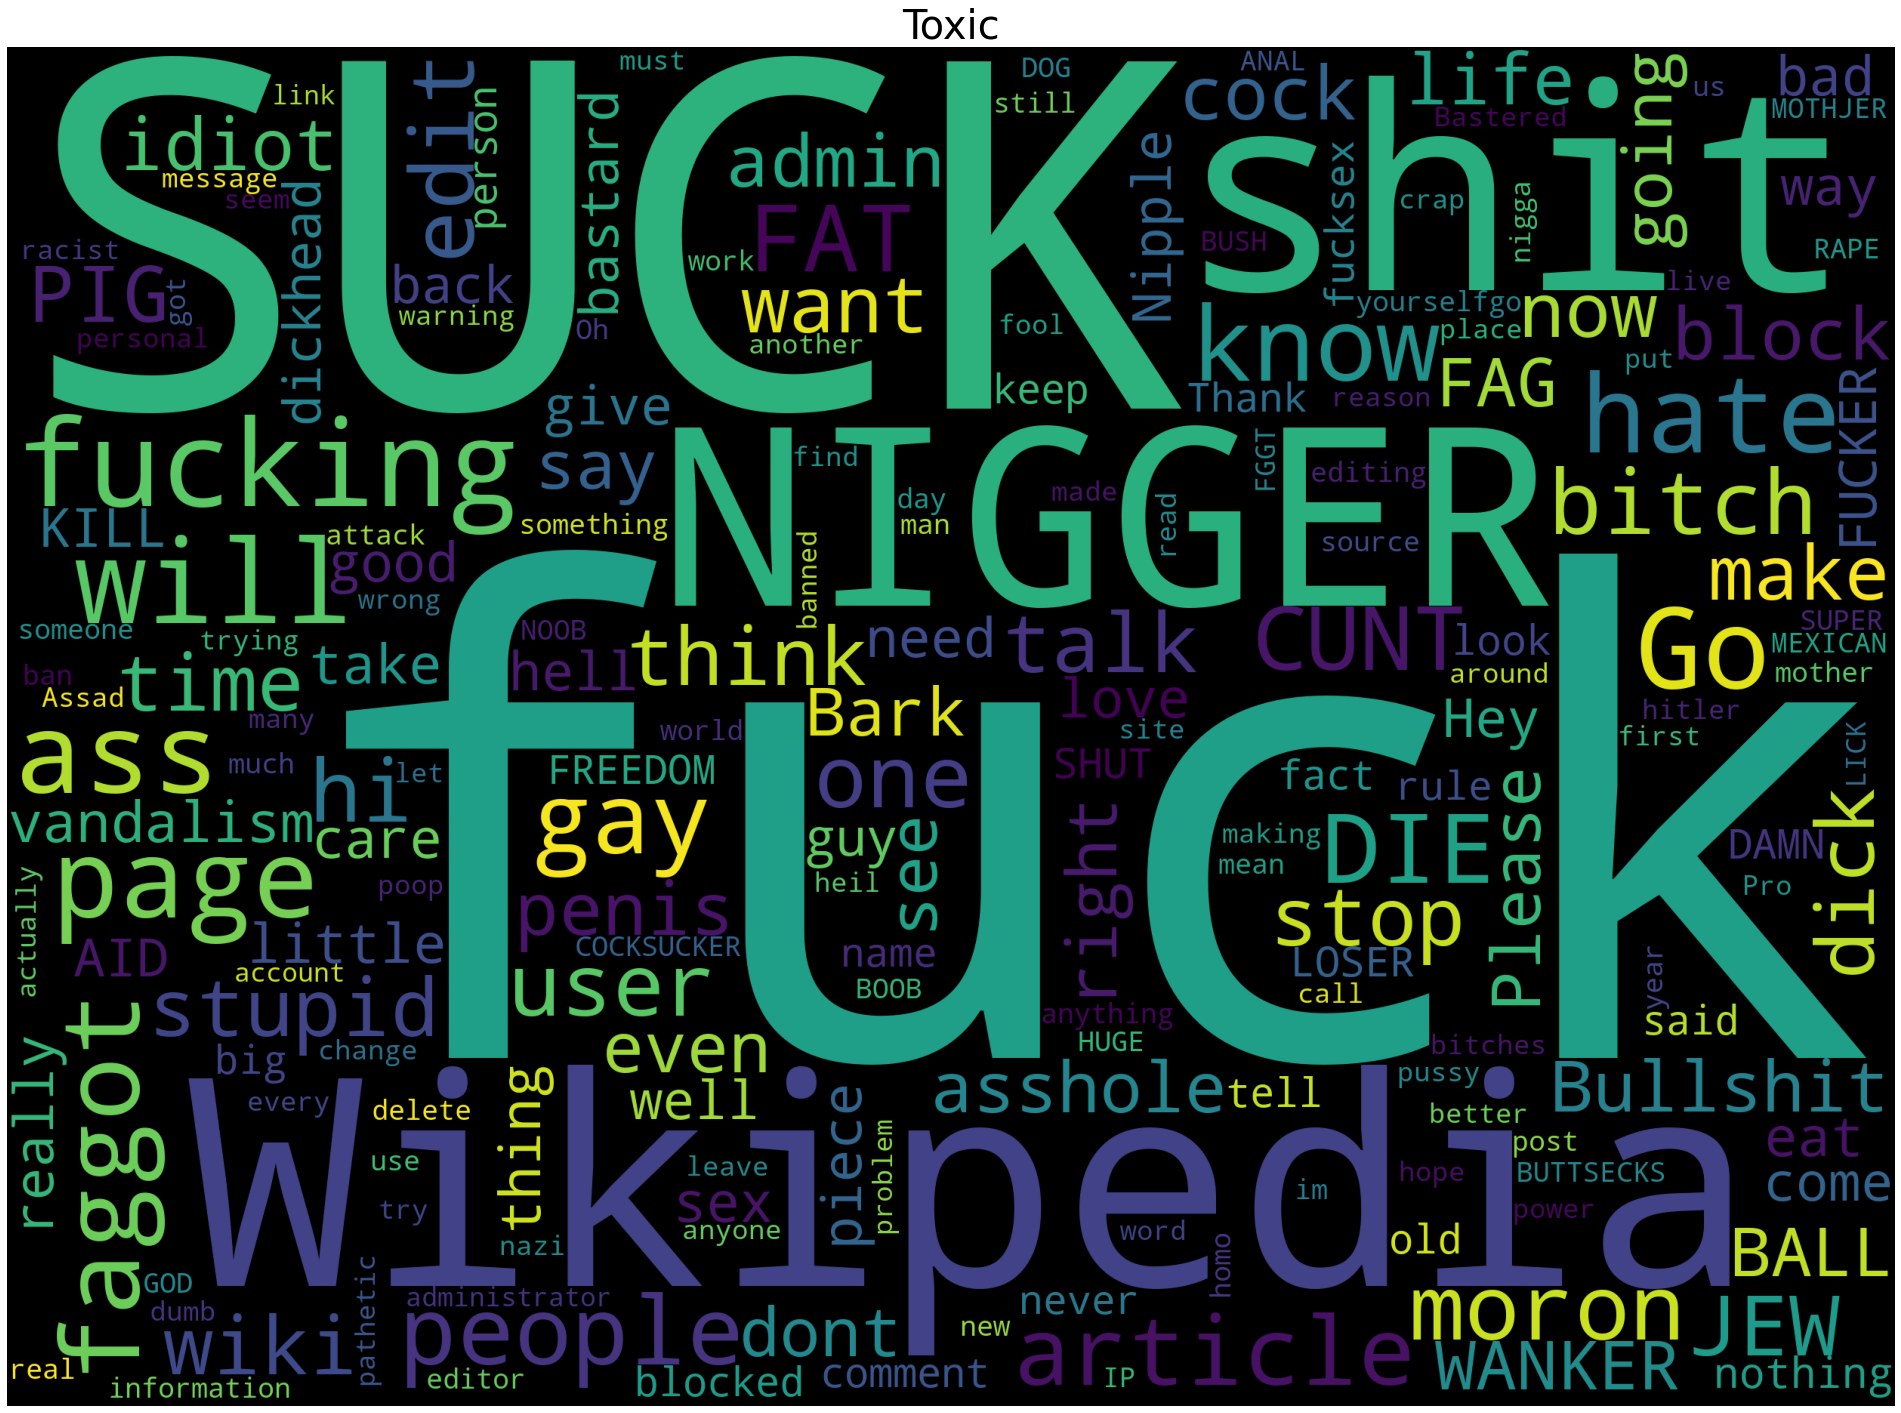

In [299]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

subset = train[train.toxic_all==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))


plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)

In [300]:
data = train
data = train.loc[np.random.choice(train.index, size=2000)]
data.shape

(2000, 9)

In [301]:
import nltk
from nltk.corpus import stopwords
import re

In [302]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [303]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_all
105424,34068c32b24723f4,actually i didnt delete any of the content it ...,0,0,0,0,0,0,0
129904,b6eae5c8329d45e2,k mgangsan there is inconsistency in k mgangsa...,0,0,0,0,0,0,0
134895,d176fb9d4a87574d,check whether all the info below have been cov...,0,0,0,0,0,0,0
96275,02e8462218f93101,i know you from somewhere where do i know you ...,0,0,0,0,0,0,0
907,027f8d819419d5fd,trying to measure the number of cafes this is ...,0,0,0,0,0,0,0


In [304]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,toxic_all
105424,34068c32b24723f4,actually didnt delete content appeared ...,0,0,0,0,0,0,0
129904,b6eae5c8329d45e2,k mgangsan inconsistency k mgangsan using ...,0,0,0,0,0,0,0
134895,d176fb9d4a87574d,check whether info covered contribution...,0,0,0,0,0,0,0
96275,02e8462218f93101,know somewhere know somewhere somewher...,0,0,0,0,0,0,0
907,027f8d819419d5fd,trying measure number cafes places ...,0,0,0,0,0,0,0


In [305]:
categories = list(train.columns.values)
category = categories[-1]
print(category)

toxic_all


In [306]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 9)
(600, 9)


In [307]:

train_text = train['comment_text']
test_text = test['comment_text']

In [308]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(ngram_range=(1, 3), strip_accents='unicode')

In [309]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text','toxic','severe_toxic','obscene','threat','insult','identity_hate'], axis=1)

In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [311]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])


print('**Processing {} comments...**'.format(category))
    
# Training logistic regression model on train data
LogReg_pipeline.fit(x_train, train[category])
    
# calculating test accuracy
prediction = LogReg_pipeline.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
print("\n")

**Processing toxic_all comments...**
Test accuracy is 0.8866666666666667


